In [233]:
from sklearn.mixture import GaussianMixture
from sklearn.datasets.samples_generator import make_blobs, make_moons
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

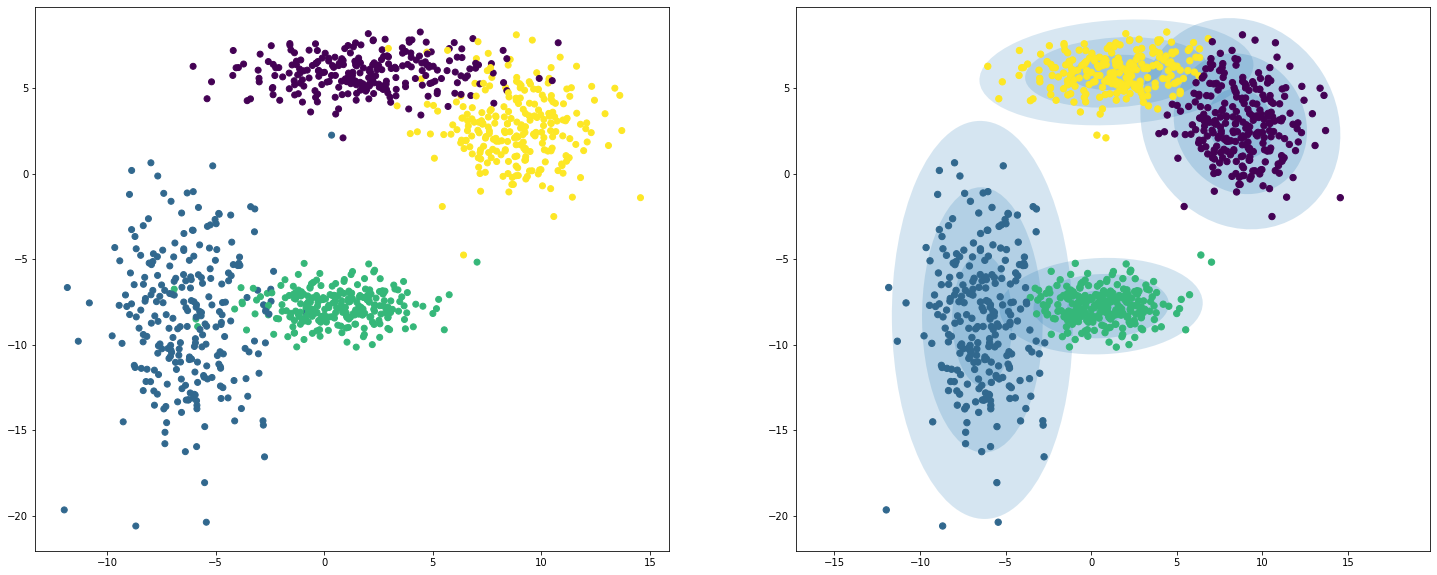

In [269]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(25,10))
X, c = make_blobs(n_samples=1000, n_features=2, centers=4, cluster_std=[[np.random.randint(1,5), np.random.randint(1,5)] for _ in range(4)])
axs[0].scatter(X[:,0], X[:,1], c=c, cmap='viridis')


gmm = GaussianMixture(n_components=4)
plot_gmm(gmm, X, ax=axs[1])
plt.savefig('Prediction.')

# How is this covariance constraint implemented?

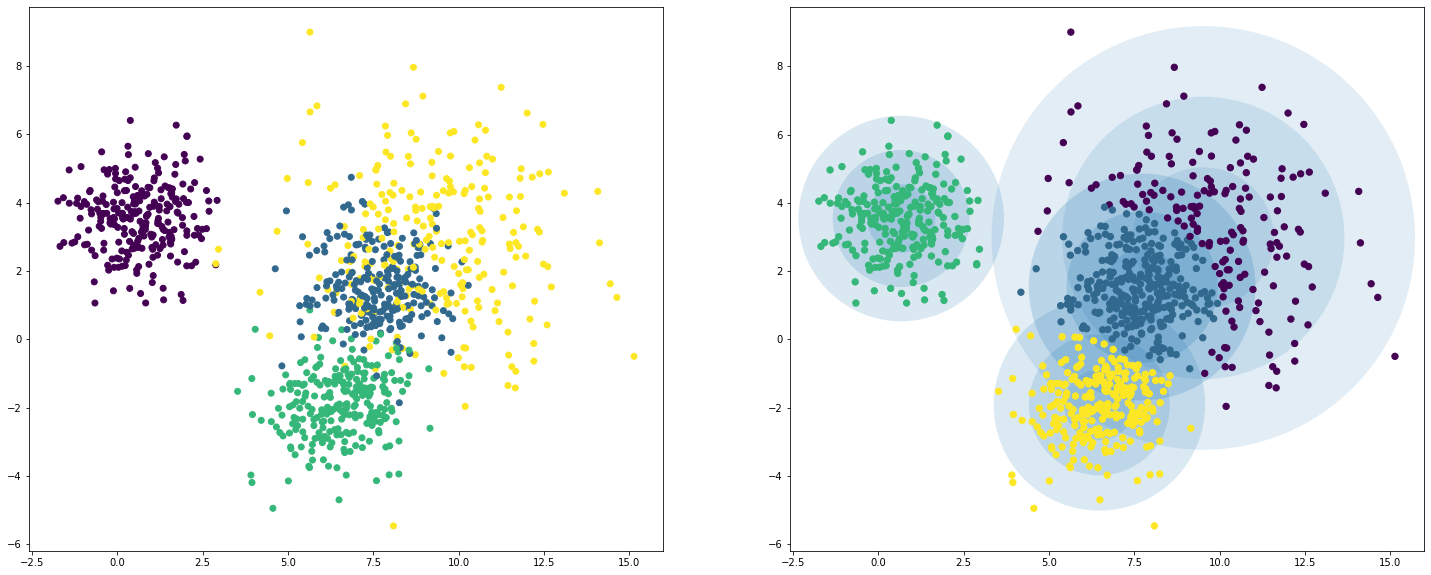

In [249]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(25,10))
X, c = make_blobs(n_samples=1000, n_features=2, centers=4, cluster_std=[np.random.randint(1,3) for _ in range(4)])
axs[0].scatter(X[:,0], X[:,1], c=c, cmap='viridis')


gmm = GaussianMixture(n_components=4, covariance_type='spherical')
plot_gmm(gmm, X, ax=axs[1])

# Could use this to model the distribution if you needed to.

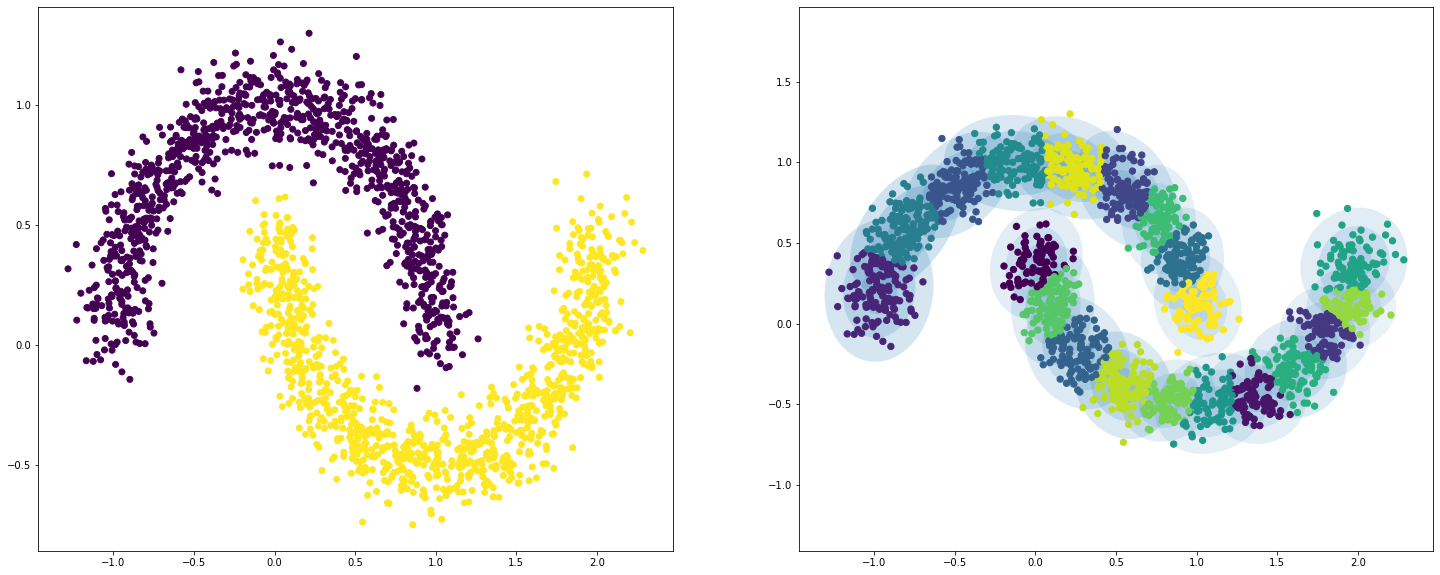

In [255]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(25,10))
X, c = make_moons(n_samples=2000, noise=.1)
axs[0].scatter(X[:,0], X[:,1], c=c, cmap='viridis')


gmm = GaussianMixture(n_components=20, covariance_type='full')
plot_gmm(gmm, X, ax=axs[1])
plt.savefig("Modeling")

In [270]:
# Got this from https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html

from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        if np.isscalar(covariance):
            width = height = 2*np.sqrt([covariance])
        else:
            width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)